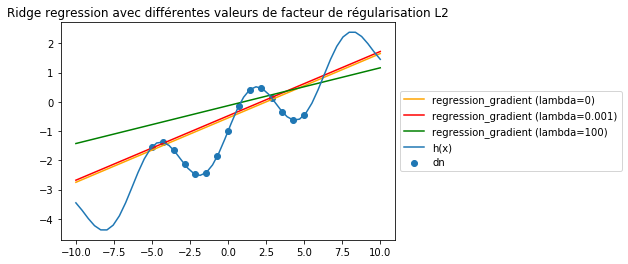

In [29]:
from Regression import RegressionGradient
import matplotlib.pyplot as plt
import numpy as np

def h(x):
    return np.sin(x) + 0.3 * x - 1

dn = np.linspace(-5, 5, 15).reshape((-1 ,1))
dn_labels = h(dn)

regression_gradient = RegressionGradient(step_size=0.01, lambda_l2=0)
regression_gradient_medLambda = RegressionGradient(step_size=0.01, lambda_l2=0.001)
regression_gradient_highLambda = RegressionGradient(step_size=0.01, lambda_l2=100)

regression_gradient.train(dn, dn_labels)
regression_gradient_medLambda.train(dn, dn_labels)
regression_gradient_highLambda.train(dn, dn_labels)
xgrid = np.linspace(-10, 10).reshape((-1 ,1))
plt.scatter(dn, dn_labels)
plt.plot(xgrid, regression_gradient.predict(xgrid), color='orange')
plt.plot(xgrid, regression_gradient_medLambda.predict(xgrid), color='red')
plt.plot(xgrid, regression_gradient_highLambda.predict(xgrid), color='green')
plt.plot(xgrid,h(xgrid))

plt.legend(["regression_gradient (lambda=0)", "regression_gradient (lambda=0.001)", "regression_gradient (lambda=100)", "h(x)", "dn"], loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Ridge regression avec différentes valeurs de facteur de régularisation L2")
plt.show()

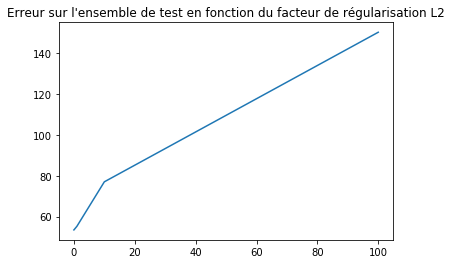

In [30]:
dtest = np.random.uniform(-5, 5, 100).reshape((-1,1))
dtest = np.sort(dtest, axis=0)
dtest_labels = h(dtest)

lambdas_l2 = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
errors = []

for lambda_l2 in lambdas_l2:
    regression_gradient = RegressionGradient(step_size=0.01, lambda_l2=lambda_l2, epochs=1000)
    regression_gradient.train(dn, dn_labels)
    predictions = regression_gradient.predict(dtest)
    errors.append(regression_gradient.compute_cost(predictions - dtest_labels))
plt.plot(lambdas_l2, errors)
plt.title("Erreur sur l'ensemble de test en fonction du facteur de régularisation L2")
plt.show()

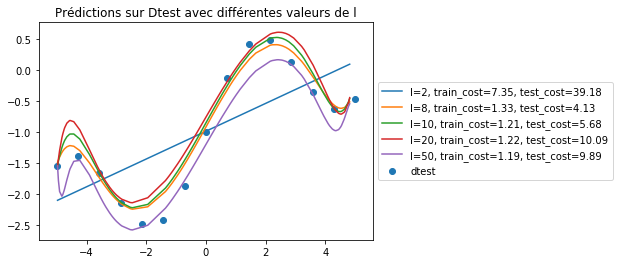

In [20]:
def phi(X, l=1):
    phi = []
    for x in X:
        powers = []
        for n in x:
            powers.append([n ** power for power in range(1, l + 1)])
        powers = np.array(powers)
        
        phi_row = []
        for i in range(powers.shape[0]):
            current_row = powers[i]
            phi_row.extend(current_row)
            for j in range(i + 1, powers.shape[0]):
                second_row = powers[j]
                for k in range(l):
                    for m in range(l - k - 1):
                        phi_row.append(current_row[k] * second_row[m])
        phi.append(phi_row)
    return np.array(phi)

powers = [2,8,10,20,50]

def min_max_normalization(dn, high=1.0, low=-1.0):
    mins = np.min(dn, axis=0)
    maxs = np.max(dn, axis=0)
    rng = maxs - mins
    return high - (((high - low) * (maxs - dn)) / rng)

legend = []
for power in powers:
    phi_dn = phi(dn, power)
    phi_dn = min_max_normalization(phi_dn)
    phi_dtest = phi(dtest, power)
    phi_dtest = min_max_normalization(phi_dtest)
    regression_gradient = RegressionGradient(step_size=0.01, lambda_l2=0.01, epochs=100000)
    _, train_cost = regression_gradient.train(phi_dn, dn_labels)
    predictions = regression_gradient.predict(phi_dtest)
    test_cost = regression_gradient.compute_cost(predictions - dtest_labels)
    plt.plot(dtest, predictions)
    legend.append("l={}, train_cost={:.2f}, test_cost={:.2f}".format(power, float(train_cost), float(test_cost)))

plt.scatter(dn, dn_labels)
#plt.scatter(dtest, dtest_labels)
legend.append("dtest")
plt.legend(legend, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Prédictions sur Dtest avec différentes valeurs de l")
plt.show()

### Q2.6

Lorsque L vaut 2, l'erreur sur l'ensemble de test semble indiquer que l'algorithme souffre de sous-apprentissage.

On remarque que lorsque L atteint une valeur autour de 10 et plus, l'erreur sur l'entraînement commence à stagner. Cependant, malgré le fait qu'une valeur de 50 donne la meilleure erreur sur l'entraînement, cette même valeur ne donne pas la deuxième moins bonne erreur sur l'ensemble de test. Cela peut s'expliquer par le fait qu'une valeur de L trop haute entraîne l'algorithme de Ridge Regression à sur-apprendre. Un autre indice, celui-ci visuel, que l'algorithme souffre de sur-apprentissage est la forme de la courbe lorsque L vaut 50. On remarque qu'au début la courbe plonge pour soudainement remonter. Ce genre de comportement erratique indique que la courbe semble trop bien épouser les points de l'ensemble d'entraînement. 

En effet, une valeur de 8 permet d'obtenir la meilleure erreur sur l'ensemble de test.  La valeur de 8 offre une moins bonne performance sur l'ensemble d'entraînement mais une meilleure capacité de généralisation et donc une meilleure performance sur l'ensemble de test.